In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
numpy 
pandas 
matplotlib.pyplot 
sklearn 
scipy.stats
multiprocessing             

In [15]:
sp = yf.download('^GSPC', '2008-01-01','2021-01-01')


[*********************100%***********************]  1 of 1 completed


In [59]:
sp.index.month.unique()



Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Date')

In [41]:
data_by_year = []
for y in sp.index.year.unique():
    data = sp[sp.index.year == y]['Close']
    data = data/max(data)
    data_by_year.append(data)

In [72]:
np.argmax(list(data_by_year[0]))

0

# seasonality

when max price occurs

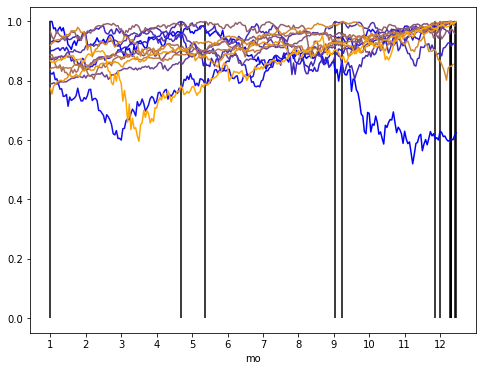

In [77]:
plt.figure(figsize=(8,6))
colors = LinearSegmentedColormap.from_list('mycmap', ['blue', 'orange'])(np.linspace(0, 1,len(data_by_year)))
for i, d in enumerate(data_by_year):
    plt.plot(list(d), color=colors[i])
    max_ = np.argmax(list(d))
    plt.vlines(max_,0,1)
plt.xticks(ticks=np.arange(0,len(d),22), labels=sp.index.month.unique())
plt.xlabel('mo')
plt.show()

## autocorrelation 

In [39]:
tsla = yf.download('TSLA', '2020-06-01','2021-01-01')


[*********************100%***********************]  1 of 1 completed


In [7]:
tsla.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

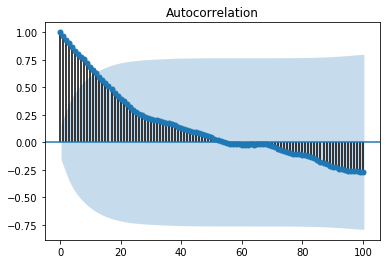

In [40]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tsla.Close, lags=100)
plt.show()

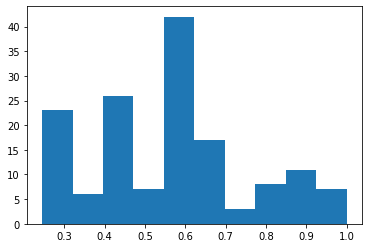

In [41]:
plt.hist(tsla.Close/max(tsla.Close));# plt.yscale('log')

In [14]:
3279%253

243

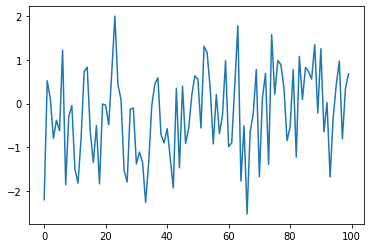

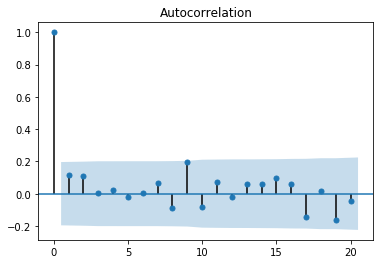

In [18]:
white_noise = np.random.normal(size=100)
plt.plot(white_noise)
plt.show()
plot_acf(white_noise)
plt.show()